In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats 

mpl.rc('font',family='Malgun Gothic')
# 음수 표시
mpl.rc('axes', unicode_minus=False)
import warnings
warnings.filterwarnings('ignore')

In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 분류 Gradient Boosting, XGBoosting
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 분류 SVM
from sklearn.svm import SVC
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# 모델 성능 평가
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_curve, roc_auc_score

from statsmodels.api import Logit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [3]:
df_raw = pd.read_csv('df_raw.csv', encoding = 'cp949')

In [4]:
df_raw.isnull().sum()

Unnamed: 0                  0
환자ID                        0
Large Lymphocyte            0
Location of herniation      0
가족력                        51
간질성폐질환                      0
고혈압여부                       0
과거수술횟수                      0
당뇨여부                        0
말초동맥질환여부                    0
빈혈여부                        0
성별                          0
스테로이드치료                     0
신부전여부                       0
신장                          0
심혈관질환                       0
암발병여부                       0
연령                          0
우울증여부                       0
입원기간                        0
입원일자                        0
종양진행여부                      0
직업                          0
체중                          0
퇴원일자                        0
헤모글로빈수치                     1
혈전합병증여부                     0
환자통증정도                      0
흡연여부                        0
통증기간(월)                     4
수술기법                       81
수술시간                       54
수술실패여부                      0
수술일자      

In [5]:
df_final = df_raw[['재발여부', '고혈압여부', '당뇨여부', '성별', '신장', '체중', '심혈관질환', '연령', '직업', '헤모글로빈수치',
                    '흡연여부', '통증기간(월)', 'BMI', '수술기법', 'MF + ES', 'PI', '디스크단면적']]
df_final = df_final.dropna(subset = ['헤모글로빈수치', '통증기간(월)', '수술기법', 'PI', '디스크단면적'])

df_final.to_csv('df_final.csv', encoding = 'cp949')

In [6]:
df_final.isnull().sum()

재발여부       0
고혈압여부      0
당뇨여부       0
성별         0
신장         0
체중         0
심혈관질환      0
연령         0
직업         0
헤모글로빈수치    0
흡연여부       0
통증기간(월)    0
BMI        0
수술기법       0
MF + ES    0
PI         0
디스크단면적     0
dtype: int64

In [7]:
df_final['직업'].value_counts()

사무직      424
기타       399
자영업      164
무직       148
학생       127
주부       108
군인        90
운수업       50
공무원       50
노동직       41
의료직       39
사업가       37
농업        36
교사        28
특수전문직     22
건설업       17
운동선수      13
예술가       10
Name: 직업, dtype: int64

In [8]:
def func1(x):
    if x == '사무직': return 1
    elif x == '기타': return 2
    elif x == '자영업': return 3
    elif x == '무직': return 4
    elif x == '학생': return 5
    elif x == '주부': return 6
    elif x == '군인': return 7
    elif x == '운수업': return 8
    elif x == '공무원': return 9
    elif x == '노동직': return 10
    elif x == '의료직': return 11
    elif x == '사업가': return 12
    elif x == '농업': return 13
    elif x == '교사': return 14
    elif x == '특수전문직': return 15
    elif x == '건설업': return 16
    elif x == '운동선수': return 17
    else: return 18
    
df_final['직업'] = df_raw['직업'].apply(func1)
df_final['직업'].value_counts()

1     424
2     399
3     164
4     148
5     127
6     108
7      90
8      50
9      50
10     41
11     39
12     37
13     36
14     28
15     22
16     17
17     13
18     10
Name: 직업, dtype: int64

In [9]:
df_final.loc[df_final['수술기법'] == 'TELD', '수술기법'] = 0
df_final.loc[df_final['수술기법'] == 'IELD', '수술기법'] = 1

df_final['수술기법'] = df_final['수술기법'].astype('int')

def func1(x) :
    if x =='TELD':
        return 0
    else:
        return 1
df_final['수술기법'] = df_final['수술기법'].apply(func1)

In [10]:
df_final = df_final.rename(columns = {'통증기간(월)':'통증기간_월', 'MF + ES':'MF_ES'})
df_final

,재발여부,고혈압여부,당뇨여부,성별,신장,체중,심혈관질환,연령,직업,헤모글로빈수치,흡연여부,통증기간_월,BMI,수술기법,MF_ES,PI,디스크단면적
0,0,0,0,2,163,60.3,0,66,3,13.66,0,1.0,22.695623,0,1824.6,51.6,2048.50
1,0,0,0,1,171,71.7,0,47,17,13.73,0,1.0,24.520365,0,1737.5,40.8,1753.10
2,0,0,0,1,178,77.1,0,39,15,15.34,0,1.0,24.334049,0,1188.5,67.5,1749.00
3,0,1,0,1,174,74.2,0,40,6,15.38,0,2.0,24.507861,0,2534.5,49.2,1796.20
4,0,1,0,1,183,80.7,0,42,15,13.08,0,1.0,24.097465,0,1840.6,58.8,2021.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,0,0,0,2,163,52.0,0,29,4,13.70,0,24.0,19.571681,0,1919.5,31.7,1813.00
1872,0,0,0,1,185,64.0,0,21,5,15.70,1,36.0,18.699781,0,2398.9,39.4,2167.60
1874,0,0,0,1,160,60.0,0,43,3,15.60,1,6.0,23.437500,0,1970.3,43.6,2250.80
1879,0,0,0,1,173,70.0,0,20,7,13.00,0,4.0,23.388687,0,2220.1,34.0,2258.80


## SMOTE 기법

In [11]:
# 학습용 / 평가용 데이터 분리
df_train, df_test = train_test_split(df_final, test_size = 0.3, random_state = 1234)
print('학습용 데이터 크기: {}'.format(df_train.shape))
print('평가용 데이터 크기: {}'.format(df_test.shape))

학습용 데이터 크기: (1262, 17)
평가용 데이터 크기: (541, 17)


In [12]:
# 설명변수와 목표변수를 분리
df_train_y = df_train['재발여부']
df_train_x = df_train.drop('재발여부', axis = 1, inplace = False)
df_test_y = df_test['재발여부']
df_test_x = df_test.drop('재발여부', axis = 1, inplace = False)

In [13]:
smote = SMOTE(random_state=0)
df_train_x_s, df_train_y_s = smote.fit_resample(df_train_x, df_train_y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', df_train_x.shape, df_train_y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', df_train_x_s.shape, df_train_y_s.shape)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (1262, 16) (1262,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (2228, 16) (2228,)


In [14]:
smote = SMOTE(random_state=0)
df_test_x_s, df_test_y_s = smote.fit_resample(df_test_x, df_test_y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', df_test_x.shape, df_test_y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', df_test_x_s.shape, df_test_y_s.shape)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (541, 16) (541,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (958, 16) (958,)


In [15]:
df_train_s = pd.concat([df_train_x_s, df_train_y_s], axis = 1)
df_train_s

,고혈압여부,당뇨여부,성별,신장,체중,심혈관질환,연령,직업,헤모글로빈수치,흡연여부,통증기간_월,BMI,수술기법,MF_ES,PI,디스크단면적,재발여부
0,0,0,2,158,48.000000,0,18,5,13.700000,0,24.000000,19.227688,1,1464.100000,14.000000,1209.500000,0
1,0,0,1,173,55.000000,0,18,5,15.000000,0,12.000000,18.376825,0,1602.300000,46.600000,1985.500000,0
2,0,0,1,176,89.000000,0,19,5,14.300000,0,48.000000,28.731921,0,2511.700000,32.800000,2154.100000,0
3,0,0,2,167,61.600000,0,35,6,14.920000,0,2.000000,22.087561,0,1883.220000,35.100000,2288.000000,0
4,0,0,1,175,93.000000,0,18,5,15.700000,0,3.000000,30.367347,0,2481.300000,52.100000,1957.800000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,0,0,2,163,59.862996,0,30,3,12.741101,0,8.835596,22.531144,0,1162.253698,51.972574,1813.028442,1
2224,0,0,1,172,77.299729,0,33,7,13.427809,0,2.000000,25.935703,0,2336.890321,37.979024,2067.634730,1
2225,0,0,1,165,59.463030,0,34,1,14.911329,0,15.310015,21.966502,0,2067.750000,47.100000,1813.250000,1
2226,1,0,1,178,87.195214,0,55,8,15.201610,0,1.938093,27.280638,0,2085.470000,35.600000,2124.280000,1


In [16]:
df_test_s = pd.concat([df_test_x_s, df_test_y_s],axis = 1)
df_test_s

,고혈압여부,당뇨여부,성별,신장,체중,심혈관질환,연령,직업,헤모글로빈수치,흡연여부,통증기간_월,BMI,수술기법,MF_ES,PI,디스크단면적,재발여부
0,0,0,2,170,85.000000,0,40,2,12.600000,0,9.000000,29.411765,0,1896.700000,40.700000,1931.100000,1
1,1,0,1,169,70.500000,1,21,7,14.860000,1,1.000000,24.684010,0,1899.900000,40.600000,2174.800000,0
2,0,1,2,153,49.000000,0,61,2,13.300000,0,12.000000,20.932120,0,2028.960000,46.000000,1738.260000,0
3,0,0,1,183,70.000000,0,28,3,15.900000,0,3.000000,20.902386,0,2453.100000,42.300000,2046.900000,0
4,0,0,1,181,94.000000,0,46,3,15.750000,0,1.000000,28.692653,0,2342.700000,46.000000,1778.700000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,0,0,1,156,61.085744,0,43,1,15.249352,0,58.058821,24.831460,0,2092.367697,43.261915,1759.692327,1
954,0,0,1,169,71.777297,0,53,6,13.181795,1,1.574054,24.769732,0,1946.545135,33.220432,2674.643935,1
955,0,0,1,169,83.779372,0,43,2,12.581221,0,9.281683,29.074201,0,1891.432520,42.399490,1939.586182,1
956,0,0,1,173,74.486636,0,29,2,13.578020,0,1.235977,24.645293,0,2713.338874,83.638930,2277.533452,1


## 로지스틱

In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1803 entries, 0 to 1891
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   재발여부     1803 non-null   int64  
 1   고혈압여부    1803 non-null   int64  
 2   당뇨여부     1803 non-null   int64  
 3   성별       1803 non-null   int64  
 4   신장       1803 non-null   int64  
 5   체중       1803 non-null   float64
 6   심혈관질환    1803 non-null   int64  
 7   연령       1803 non-null   int64  
 8   직업       1803 non-null   int64  
 9   헤모글로빈수치  1803 non-null   float64
 10  흡연여부     1803 non-null   int64  
 11  통증기간_월   1803 non-null   float64
 12  BMI      1803 non-null   float64
 13  수술기법     1803 non-null   int32  
 14  MF_ES    1803 non-null   float64
 15  PI       1803 non-null   float64
 16  디스크단면적   1803 non-null   float64
dtypes: float64(7), int32(1), int64(9)
memory usage: 246.5 KB


In [18]:
log_model = Logit.from_formula('재발여부 ~ 고혈압여부 + 성별 + 신장 + 체중 + 심혈관질환 + 연령 + 직업 + 헤모글로빈수치 + BMI', df_train_s)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.542808
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   재발여부   No. Observations:                 2228
Model:                          Logit   Df Residuals:                     2218
Method:                           MLE   Df Model:                            9
Date:                Mon, 28 Feb 2022   Pseudo R-squ.:                  0.2169
Time:                        16:18:19   Log-Likelihood:                -1209.4
converged:                       True   LL-Null:                       -1544.3
Covariance Type:            nonrobust   LLR p-value:                2.029e-138
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.1034      9.357     12.835      0.000     101.763     138.444
고혈압여부         -0.5167      0.

In [19]:
y_pred = log_result.predict(df_train_s)

y_pred_class = (y_pred > 0.5).astype(int)
print('학습용 데이터 정확도: {0:.3f}'.format(accuracy_score(df_train_s['재발여부'], y_pred_class)))
# 평가용 데이터 예측
y_pred = log_result.predict(df_test_s)

y_pred_class = (y_pred > 0.5).astype(int)
print('평가용 데이터 정확도: {0:.3f}'.format(accuracy_score(df_test_s['재발여부'], y_pred_class)))

학습용 데이터 정확도: 0.738
평가용 데이터 정확도: 0.734


In [20]:
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_s['재발여부'],y_pred_class)))

Confusion Matrix: 
[[345 134]
 [121 358]]


In [21]:
print("Classification Report: \n", classification_report(df_test_s["재발여부"], y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       479
           1       0.73      0.75      0.74       479

    accuracy                           0.73       958
   macro avg       0.73      0.73      0.73       958
weighted avg       0.73      0.73      0.73       958



## XGBoost

In [22]:
df_train_1, df_test_1 = train_test_split(df_final, test_size = 0.3, random_state = 1234)
print('학습용 데이터 크기: {}'.format(df_train_1.shape))
print('평가용 데이터 크기: {}'.format(df_test_1.shape))

학습용 데이터 크기: (1262, 17)
평가용 데이터 크기: (541, 17)


In [23]:
# 설명변수와 목표변수를 분리
df_train_1_y = df_train_1['재발여부']
df_train_1_x = df_train_1.drop('재발여부', axis = 1, inplace = False)
df_test_1_y = df_test_1['재발여부']
df_test_1_x = df_test_1.drop('재발여부', axis = 1, inplace = False)

In [24]:
smote = SMOTE(random_state=0)
df_train_x_s, df_train_y_s = smote.fit_resample(df_train_1_x, df_train_1_y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', df_train_1_x.shape, df_train_1_y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', df_train_x_s.shape, df_train_y_s.shape)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (1262, 16) (1262,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (2228, 16) (2228,)


In [25]:
smote = SMOTE(random_state=0)
df_test_x_s, df_test_y_s = smote.fit_resample(df_test_1_x, df_test_1_y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', df_test_1_x.shape, df_test_1_y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', df_test_x_s.shape, df_test_y_s.shape)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (541, 16) (541,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (958, 16) (958,)


In [26]:
# 기본 모델 생성
xgb_uncustomized = XGBClassifier(random_state = 1234)
xgb_uncustomized.fit(df_train_x_s, df_train_y_s)
# 데이터 정확도
print('학습용 데이터의 정확도 : {:.3f}'.format(xgb_uncustomized.score(df_train_x_s, df_train_y_s)))
print('평가용 데이터의 정확도 : {:.3f}'.format(xgb_uncustomized.score(df_test_x_s, df_test_y_s)))

[16:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
학습용 데이터의 정확도 : 1.000
평가용 데이터의 정확도 : 0.718


In [27]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# learning_rate 학습률 변경: 0.1 ~ 0.9
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    xgb = XGBClassifier(learning_rate = v_learning_rate, random_state = 1234)
    xgb.fit(df_train_x_s, df_train_y_s)
    y_pred = xgb.predict(df_train_x_s)
    train_accuracy.append(f1_score(df_train_y_s, y_pred))
    y_pred = xgb.predict(df_test_x_s)
    test_accuracy.append(f1_score(df_test_y_s, y_pred))

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['LearningRate'] = para_lr
df_accuracy_lr['TrainAccuracy'] = train_accuracy
df_accuracy_lr['TestAccuracy'] = test_accuracy

[16:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [28]:
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,0.998,0.661
1,0.2,1.000,0.649
2,0.3,1.000,0.649
3,0.4,1.000,0.656
4,0.5,1.000,0.649
5,0.6,1.000,0.653
6,0.7,1.000,0.643
7,0.8,1.000,0.649
8,0.9,1.000,0.639


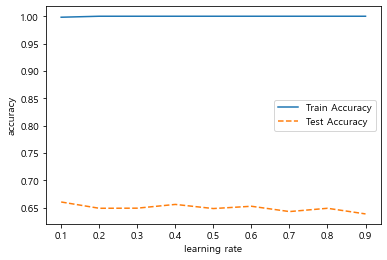

In [29]:
plt.plot(para_lr, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_lr, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('learning rate')
plt.legend()

- learning rate = 0.4

In [30]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    xgb = XGBClassifier(n_estimators = v_n_estimators, learning_rate = 0.4, random_state = 1234)
    xgb.fit(df_train_x_s, df_train_y_s)
    y_pred = xgb.predict(df_train_x_s)
    train_accuracy.append(f1_score(df_train_y_s, y_pred))
    y_pred = xgb.predict(df_test_x_s)
    test_accuracy.append(f1_score(df_test_y_s, y_pred))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n['Estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

[16:18:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [31]:
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.962,0.689
1,20,0.992,0.649
2,30,0.999,0.657
3,40,1.000,0.638
4,50,1.000,0.642
5,60,1.000,0.647
6,70,1.000,0.650
7,80,1.000,0.649
8,90,1.000,0.650
9,100,1.000,0.656


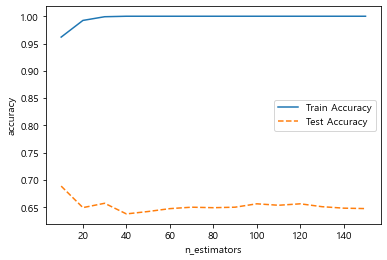

In [32]:
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('n_estimators')
plt.legend()

- n_estimators = 10 or 30

In [33]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    xgb = XGBClassifier(max_depth = v_max_depth, n_estimators = 100, learning_rate = 0.4, random_state = 1234)
    xgb.fit(df_train_x_s, df_train_y_s)
    y_pred = xgb.predict(df_train_x_s)
    train_accuracy.append(f1_score(df_train_y_s, y_pred))
    y_pred = xgb.predict(df_test_x_s)
    test_accuracy.append(f1_score(df_test_y_s, y_pred))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

[16:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [34]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.824,0.703
1,2,0.939,0.745
2,3,0.993,0.727
3,4,1.000,0.682
4,5,1.000,0.666
5,6,1.000,0.656
6,7,1.000,0.654
7,8,1.000,0.623
8,9,1.000,0.654
9,10,1.000,0.664


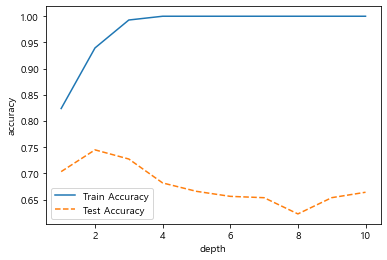

In [35]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('depth')
plt.legend()

- max_depth = 2

In [36]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_gamma = [10 **gamma for gamma in range(-2, 2)]

for v_gamma in para_gamma:
    xgb = XGBClassifier(gamma = v_gamma, n_estimators = 100, learning_rate = 0.4, max_depth = 2, random_state = 1234)
    xgb.fit(df_train_x_s, df_train_y_s)
    y_pred = xgb.predict(df_train_x_s)
    train_accuracy.append(f1_score(df_train_y_s, y_pred))
    y_pred = xgb.predict(df_test_x_s)
    test_accuracy.append(f1_score(df_test_y_s, y_pred))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

[16:18:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [37]:
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.939,0.745
1,0.10,0.939,0.745
2,1.00,0.939,0.745
3,10.00,0.822,0.682


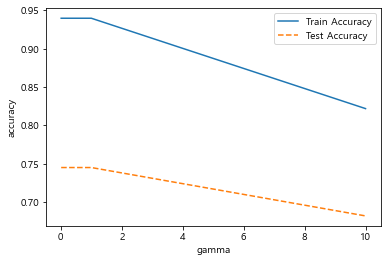

In [38]:
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('gamma')
plt.legend()

- gamma = 0.01

In [39]:
# manual 모델
xgb_manual = XGBClassifier(max_depth = 2, n_estimators = 100, learning_rate = 0.4, gamma = 0.01, booster = 'gbtree',
                          objective = 'binary:logistic', random_state = 1234)
xgb_manual.fit(df_train_x_s, df_train_y_s)
# 예측
y_pred = xgb_manual.predict(df_test_x_s)

# 데이터 정확도
print('학습용 데이터의 정확도 : {:.3f}'.format(xgb_manual.score(df_train_x_s, df_train_y_s)))
print('평가용 데이터의 정확도 : {:.3f}'.format(xgb_manual.score(df_test_x_s, df_test_y_s)))
# 혼동행렬
print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y_s, y_pred)))

[16:18:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
학습용 데이터의 정확도 : 0.940
평가용 데이터의 정확도 : 0.776
Confusion matrix: 
[[429  50]
 [165 314]]


In [40]:
# 최종 모델
xgb_final = XGBClassifier(max_depth = 2, n_estimators = 100, learning_rate = 0.4, gamma = 0.01, booster = 'gbtree',
                          objective = 'binary:logistic', random_state = 1234)
xgb_final.fit(df_train_x_s, df_train_y_s)
# 예측
test_pred_y = xgb_final.predict(df_test_x_s)
# 데이터 정확도
print('학습용 데이터의 정확도 : {:.3f}'.format(xgb_final.score(df_train_x_s, df_train_y_s)))
print('평가용 데이터의 정확도 : {:.3f}'.format(xgb_final.score(df_test_x_s, df_test_y_s)))
# 혼동행렬
print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y_s, test_pred_y)))

[16:18:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
학습용 데이터의 정확도 : 0.940
평가용 데이터의 정확도 : 0.776
Confusion matrix: 
[[429  50]
 [165 314]]


In [41]:
# classification Report
print('Classification Report: \n', classification_report(df_test_y_s, test_pred_y))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.90      0.80       479
           1       0.86      0.66      0.74       479

    accuracy                           0.78       958
   macro avg       0.79      0.78      0.77       958
weighted avg       0.79      0.78      0.77       958



## LGBM

In [42]:
from lightgbm import LGBMClassifier

In [43]:
# 기본 모델 생성
lgbm_uncustomized = LGBMClassifier(random_state = 1234)
lgbm_uncustomized.fit(df_train_x_s, df_train_y_s)
# 데이터 정확도
print('학습용 데이터 정확도: {:.3f}'.format(lgbm_uncustomized.score(df_train_x_s, df_train_y_s)))
print('평가용 데이터 정확도: {:.3f}'.format(lgbm_uncustomized.score(df_test_x_s, df_test_y_s)))

학습용 데이터 정확도: 1.000
평가용 데이터 정확도: 0.728


In [44]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# learning_rate 학습률 변경: 0.1 ~ 0.9
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    lgbm = LGBMClassifier(learning_rate = v_learning_rate, random_state = 1234)
    lgbm.fit(df_train_x_s, df_train_y_s)
    y_pred = lgbm.predict(df_train_x_s)
    train_accuracy.append(f1_score(df_train_y_s, y_pred))
    y_pred = lgbm.predict(df_test_x_s)
    test_accuracy.append(f1_score(df_test_y_s, y_pred))

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['LearningRate'] = para_lr
df_accuracy_lr['TrainAccuracy'] = train_accuracy
df_accuracy_lr['TestAccuracy'] = test_accuracy

In [45]:
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,1.0,0.660
1,0.2,1.0,0.644
2,0.3,1.0,0.644
3,0.4,1.0,0.643
4,0.5,1.0,0.647
5,0.6,1.0,0.627
6,0.7,1.0,0.636
7,0.8,1.0,0.659
8,0.9,1.0,0.634


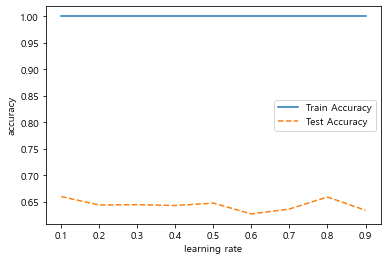

In [46]:
plt.plot(para_lr, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_lr, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('learning rate')
plt.legend()

- learning_rate = 0.8

In [47]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_num_leaves = [num_leaves * 10 for num_leaves in range(1, 16)]

for v_num_leaves in para_num_leaves:
    lgbm = LGBMClassifier(num_leaves = v_num_leaves, learning_rate = 0.8, random_state = 1234)
    lgbm.fit(df_train_x_s, df_train_y_s)
    y_pred = lgbm.predict(df_train_x_s)
    train_accuracy.append(f1_score(df_train_y_s, y_pred))
    y_pred = lgbm.predict(df_test_x_s)
    test_accuracy.append(f1_score(df_test_y_s, y_pred))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n['Estimators'] = para_num_leaves
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

In [48]:
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,1.0,0.656
1,20,1.0,0.652
2,30,1.0,0.627
3,40,1.0,0.634
4,50,1.0,0.608
5,60,1.0,0.607
6,70,1.0,0.630
7,80,1.0,0.619
8,90,1.0,0.626
9,100,1.0,0.615


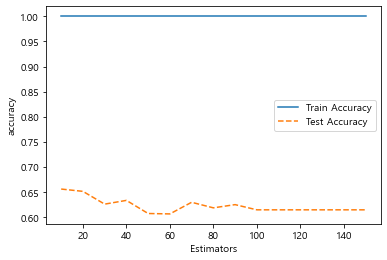

In [49]:
plt.plot(para_num_leaves, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_num_leaves, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Estimators')
plt.legend()

num_leaves = 20

In [50]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    lgbm = LGBMClassifier(max_depth = v_max_depth, num_leaves = 20, learning_rate = 0.8, random_state = 1234)
    lgbm.fit(df_train_x_s, df_train_y_s)
    y_pred = lgbm.predict(df_train_x_s)
    train_accuracy.append(f1_score(df_train_y_s, y_pred))
    y_pred = lgbm.predict(df_test_x_s)
    test_accuracy.append(f1_score(df_test_y_s, y_pred))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

In [51]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.849,0.728
1,2,0.976,0.759
2,3,1.000,0.674
3,4,1.000,0.695
4,5,1.000,0.668
5,6,1.000,0.687
6,7,1.000,0.650
7,8,1.000,0.629
8,9,1.000,0.627
9,10,1.000,0.669


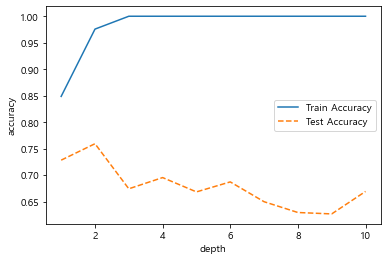

In [52]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('depth')
plt.legend()

- depth = 2

In [53]:
# manual 모델
lgbm_manual = LGBMClassifier(max_depth = 2, num_leaves = 20, learning_rate = 0.8, random_state = 1234)
lgbm_manual.fit(df_train_x_s, df_train_y_s)
# 예측
y_pred = lgbm_manual.predict(df_test_x_s)

# 데이터 정확도
print('학습용 데이터의 정확도 : {:.3f}'.format(lgbm_manual.score(df_train_x_s, df_train_y_s)))
print('평가용 데이터의 정확도 : {:.3f}'.format(lgbm_manual.score(df_test_x_s, df_test_y_s)))
# 혼동행렬
print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y_s, y_pred)))

학습용 데이터의 정확도 : 0.976
평가용 데이터의 정확도 : 0.785
Confusion matrix: 
[[427  52]
 [154 325]]


In [54]:
# 최종 모델
lgbm_final = LGBMClassifier(max_depth = 2, num_leaves = 20, learning_rate = 0.8, random_state = 1234)
lgbm_final.fit(df_train_x_s, df_train_y_s)
# 예측
test_pred_y = lgbm_final.predict(df_test_x_s)
# 데이터 정확도
print('학습용 데이터의 정확도: {:.3f}'.format(lgbm_final.score(df_train_x_s, df_train_y_s)))
print('평가용 데이터의 정확도: {:.3f}\n'.format(lgbm_final.score(df_test_x_s, df_test_y_s)))

학습용 데이터의 정확도: 0.976
평가용 데이터의 정확도: 0.785



In [55]:
# 혼동행렬
print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y_s, test_pred_y)))

Confusion matrix: 
[[427  52]
 [154 325]]


In [56]:
# Classification Report
print('Classification Report: \n', classification_report(df_test_y_s, test_pred_y))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.89      0.81       479
           1       0.86      0.68      0.76       479

    accuracy                           0.78       958
   macro avg       0.80      0.78      0.78       958
weighted avg       0.80      0.78      0.78       958



## SVM

In [57]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x_s, df_train_y_s)
# 데이터 정확도
print("학습용 데이터의 정확도 : {:.3f}".format(svm_uncustomized.score(df_train_x_s, df_train_y_s)))
print("평가용 데이터의 정확도 : {:.3f}".format(svm_uncustomized.score(df_test_x_s, df_test_y_s)))

학습용 데이터의 정확도 : 0.593
평가용 데이터의 정확도 : 0.577


In [58]:
# 변수명 저장
v_feature_name = df_train_x_s.columns
# StandardScaler 적용
scaler = StandardScaler()
df_train_scaled_x = scaler.fit_transform(df_train_x_s)
df_test_scaled_x = scaler.transform(df_test_x_s)
df_train_scaled_x = pd.DataFrame(df_train_scaled_x, columns = v_feature_name)
df_test_scaled_x = pd.DataFrame(df_test_scaled_x, columns = v_feature_name)
df_train_scaled_x.head()

,고혈압여부,당뇨여부,성별,신장,체중,심혈관질환,연령,직업,헤모글로빈수치,흡연여부,통증기간_월,BMI,수술기법,MF_ES,PI,디스크단면적
0,-0.332668,-0.235423,1.736207,-1.254169,-1.963922,-0.148386,-1.940270,0.201285,-0.715787,-0.491851,0.852207,-1.857402,3.861902,-1.463884,-1.529601,-2.595094
1,-0.332668,-0.235423,-0.575968,0.495542,-1.358704,-0.148386,-1.940270,0.201285,0.232907,-0.491851,0.264405,-2.148343,-0.258940,-1.162678,0.030894,-0.143152
2,-0.332668,-0.235423,-0.575968,0.845485,1.580925,-0.148386,-1.859446,0.201285,-0.277928,-0.491851,2.027810,1.392443,-0.258940,0.819355,-0.629684,0.389576
3,-0.332668,-0.235423,1.736207,-0.204342,-0.788070,-0.148386,-0.566272,0.466962,0.174525,-0.491851,-0.225430,-0.879507,-0.258940,-0.550414,-0.519588,0.812663
4,-0.332668,-0.235423,-0.575968,0.728837,1.926764,-0.148386,-1.940270,0.201285,0.743742,-0.491851,-0.176447,1.951655,-0.258940,0.753098,0.294167,-0.230676


In [59]:
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_train_scaled_x, df_train_y_s)
# 데이터 정확도
print('학습용 데이터의 정확도 : {:.3f}'.format(svm_scaled.score(df_train_scaled_x, df_train_y_s)))
print('평가용 데이터의 정확도 : {:.3f}'.format(svm_scaled.score(df_test_scaled_x, df_test_y_s)))

학습용 데이터의 정확도 : 0.820
평가용 데이터의 정확도 : 0.687


In [60]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# c: 규제(0.01, 0.1, 1, 10)
para_c = [10 **c for c in range(-2, 2)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_scaled_x, df_train_y_s)
    y_pred = svm.predict(df_train_scaled_x)
    train_accuracy.append(f1_score(df_train_y_s, y_pred))
    y_pred = svm.predict(df_test_scaled_x)
    test_accuracy.append(f1_score(df_test_y_s, y_pred))
    
# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [61]:
# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.698,0.669
1,0.10,0.769,0.692
2,1.00,0.824,0.667
3,10.00,0.904,0.645


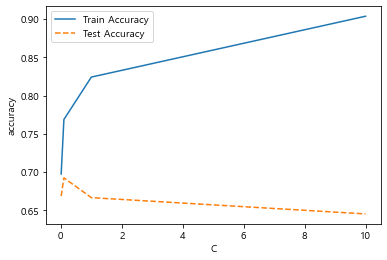

In [62]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

- C = 0.1

In [63]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# gamma: 규제(0.01, 0.1, 1, 10)
para_gamma = [10 **gamma for gamma in range(-2, 2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.1, random_state = 1234)
    svm.fit(df_train_scaled_x, df_train_y_s)
    y_pred = svm.predict(df_train_scaled_x)
    train_accuracy.append(f1_score(df_train_y_s, y_pred))
    y_pred = svm.predict(df_test_scaled_x)
    test_accuracy.append(f1_score(df_test_y_s, y_pred))
    
# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [64]:
# Gamma별 정확도 테이블
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.728,0.692
1,0.10,0.773,0.674
2,1.00,0.468,0.090
3,10.00,0.064,0.004


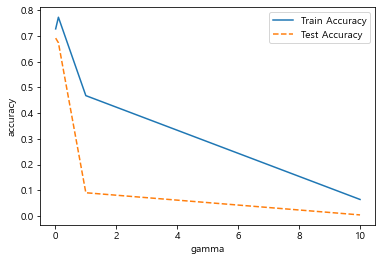

In [65]:
# Gamma별 정확도 그래프로 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

- gamma = 0.01

In [66]:
svc_manual = SVC(gamma = 0.01, C = 0.1, random_state=1234)
svc_manual.fit(df_train_scaled_x, df_train_y_s)
# 평가
y_pred = svc_manual.predict(df_test_scaled_x)
# 데이터 정확도
print("학습용 데이터의 정확도 : {:.3f}".format(svc_manual.score(df_train_scaled_x, df_train_y_s)))
print("평가용 데이터의 정확도 : {:.3f}".format(svc_manual.score(df_test_scaled_x, df_test_y_s)))

학습용 데이터의 정확도 : 0.671
평가용 데이터의 정확도 : 0.640


In [67]:
# 최종 모델
svc_final = SVC(gamma = 0.01, C = 0.1, random_state = 1234)
svc_final.fit(df_train_scaled_x, df_train_y_s)
# 평가
y_pred = svc_final.predict(df_test_scaled_x)
# 데이터 정확도
print("학습용 데이터의 정확도 : {:.3f}".format(svc_final.score(df_train_scaled_x, df_train_y_s)))
print("평가용 데이터의 정확도 : {:.3f}".format(svc_final.score(df_test_scaled_x, df_test_y_s)))
# 혼동행렬
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y_s, y_pred)))
# classification Report
print('Classification Report : \n', classification_report(df_test_y_s, y_pred))

학습용 데이터의 정확도 : 0.671
평가용 데이터의 정확도 : 0.640
Confusion matrix: 
[[226 253]
 [ 92 387]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.47      0.57       479
           1       0.60      0.81      0.69       479

    accuracy                           0.64       958
   macro avg       0.66      0.64      0.63       958
weighted avg       0.66      0.64      0.63       958



In [68]:
from sklearn.metrics import f1_score, roc_curve, roc_auc_score

In [69]:
# 분석 모델
model = ['Logistic', 'XGBoost', 'LGBM', 'SVM']
# 정확도 저장
train_accuracy = []; test_accuracy = []
# f1 score 저장
model_f1_score = []
# auc score 저장
model_auc = []

In [70]:
# 모델 생성
log_model = Logit.from_formula('재발여부 ~ 고혈압여부 + 성별 + 신장 + 체중 + 심혈관질환 + 연령 + 직업 + 헤모글로빈수치 + BMI', df_train_s)
log_result = log_model.fit()

y_pred = log_result.predict(df_train_s)
# 0과 1의 값을 가진 class로 변환
y_pred_class = (y_pred > 0.25).astype(int)
train_accuracy.append(accuracy_score(df_train_s['재발여부'], y_pred_class))

# 평가용 데이터 예측
y_pred = log_result.predict(df_test_s)
y_pred_class = (y_pred > 0.25).astype(int)
test_accuracy.append(accuracy_score(df_test_s['재발여부'], y_pred_class))

# roc_auc 계산
roc_auc = roc_auc_score(df_test_s['재발여부'], y_pred_class)
# auc 저장
model_auc.append(roc_auc)
# f1 스코어
model_f1_score.append(f1_score(df_test_s['재발여부'], y_pred_class))

Optimization terminated successfully.
         Current function value: 0.542808
         Iterations 6


In [71]:
# 모델 생성
xgb_final = XGBClassifier(max_depth = 2, n_estimators = 30, learning_rate = 0.4, gamma = 0.01, booster = 'gbtree',
                          objective = 'binary:logistic', random_state = 1234)
xgb_final.fit(df_train_x_s, df_train_y_s)

# train 정확도
train_accuracy.append(xgb_final.score(df_train_x_s, df_train_y_s))
# test 정확도
test_accuracy.append(xgb_final.score(df_test_x_s, df_test_y_s))

# 예측
test_pred_y = xgb_final.predict(df_test_x_s)

# roc_auc 계산
roc_auc = roc_auc_score(df_test_y_s, test_pred_y)
# auc 저장
model_auc.append(roc_auc)
# f1 스코어
model_f1_score.append(f1_score(df_test_y_s, test_pred_y))

[16:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [72]:
# 모델 생성
lgbm_final = LGBMClassifier(max_depth = 2, num_leaves = 20, learning_rate = 0.8, random_state = 1234)
lgbm_final.fit(df_train_x_s, df_train_y_s)

# train 정확도
train_accuracy.append(lgbm_final.score(df_train_x_s, df_train_y_s))
# test 정확도
test_accuracy.append(lgbm_final.score(df_test_x_s, df_test_y_s))

# 예측
test_pred_y = lgbm_final.predict(df_test_x_s)

# roc_auc 계산
roc_auc = roc_auc_score(df_test_y_s, test_pred_y)
# auc 저장
model_auc.append(roc_auc)
# f1 스코어
model_f1_score.append(f1_score(df_test_y_s, test_pred_y))

In [73]:
# 모델 생성
svc_final = SVC(gamma = 0.01, C = 0.1, random_state = 1234)
svc_final.fit(df_train_scaled_x, df_train_y_s)

# train 정확도
train_accuracy.append(svc_final.score(df_train_scaled_x, df_train_y_s))
# test 정확도
test_accuracy.append(svc_final.score(df_test_scaled_x, df_test_y_s))

# 예측
y_pred = svc_final.predict(df_test_scaled_x)

# roc_auc 계산
roc_auc = roc_auc_score(df_test_y_s, y_pred)
# auc 저장
model_auc.append(roc_auc)
# f1 스코어
model_f1_score.append(f1_score(df_test_y_s, y_pred))

In [74]:
# 모델별 정확도 표
df_eval = pd.DataFrame(index = model)
df_eval['TrainAccuracy'] = train_accuracy
df_eval['TestAccuracy'] = test_accuracy
df_eval['F1Score'] = model_f1_score
df_eval['AUC'] = model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
Logistic,0.644,0.634,0.714,0.634
XGBoost,0.868,0.752,0.720,0.752
LGBM,0.976,0.785,0.759,0.785
SVM,0.671,0.640,0.692,0.640


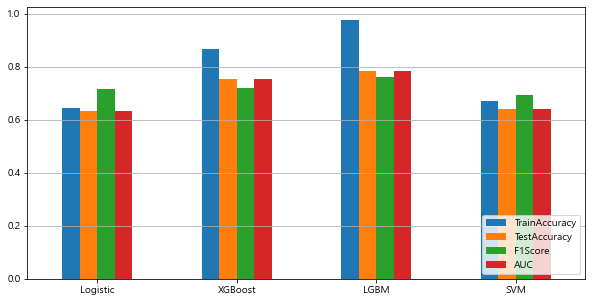

In [75]:
# 정확도 bar plot 생성
df_eval.plot.bar(rot = 0, figsize = (10, 5))
plt.legend(loc = 'lower right')
plt.grid(axis = 'y')

### F1Score기준으로 LGBM 선정